


# 📘 Marco Teórico: Redes Neuronales LSTM (Long Short-Term Memory)

## 1. Introducción

Las redes neuronales **LSTM (Long Short-Term Memory)** son una arquitectura avanzada de redes neuronales recurrentes (**RNN**) diseñada para **aprender dependencias de largo plazo** en secuencias de datos.  
A diferencia de las RNN tradicionales, las LSTM logran mantener información relevante durante largos periodos, evitando el problema del **desvanecimiento o explosión del gradiente**.

Estas redes son especialmente útiles en:
- Predicción de series temporales (finanzas, clima, energía).
- Modelado de lenguaje natural (traducción, texto).
- Señales biológicas (EEG, ECG).
- Predicciones financieras (precios, retornos, volatilidad).

---

## 2. Fundamento Teórico

### 2.1. Redes Neuronales Recurrentes (RNN)

Las RNN procesan información secuencial manteniendo un **estado oculto** que captura dependencias temporales.

$$
h_t = f(W_h \cdot h_{t-1} + W_x \cdot x_t + b)
$$

donde:
- $x_t$: entrada en el tiempo *t*  
- $h_t$: estado oculto actual  
- $h_{t-1}$: estado oculto anterior  
- $W_h, W_x$: matrices de pesos  
- $b$: sesgo  
- $f$: función de activación (tanh o ReLU)

El entrenamiento se realiza mediante **retropropagación en el tiempo (BPTT)**, pero los gradientes tienden a **desvanecerse o explotar**, impidiendo el aprendizaje de relaciones a largo plazo.

### Ejemplo rápido

Si quieres predecir el precio de mañana a partir de los últimos días:

	•	xₜ = precio de hoy
	•	hₜ₋₁ = conocimiento acumulado de los días anteriores
	•	hₜ = nueva memoria (que se usará mañana para seguir prediciendo)

⸻

### 💡 En resumen

La RNN combina el pasado con el presente para decidir qué recordar y qué olvidar.

$$ \boxed{
h_t = f(\text{pasado} + \text{presente})
} $$

---

## 3. Arquitectura LSTM

Las **LSTM** introducen un mecanismo de memoria que controla qué información se **retiene**, **actualiza** o **descarta**.  
Su núcleo es una celda de memoria ($c_t$) y tres puertas:

1. **Puerta de Olvido (Forget Gate)**  
   Decide qué información eliminar.  
   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$

2. **Puerta de Entrada (Input Gate)**  
   Determina qué información nueva almacenar.  
   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$  
   $$
   \tilde{c}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)
   $$

3. **Puerta de Salida (Output Gate)**  
   Controla qué parte del estado de celda se usa como salida.  
   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$  
   $$
   h_t = o_t \odot \tanh(c_t)
   $$

Finalmente, la **actualización del estado de la celda** es:
$$
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
$$

donde $\odot$ representa la multiplicación elemento a elemento.

⸻

## ⚙️ Ejemplo rápido: cómo piensa una LSTM

Imagina que la red está aprendiendo los precios diarios de una acción
y quiere predecir el precio de mañana 📈

⸻

1️⃣ Puerta de Olvido – “¿Qué debo olvidar?”

Fórmula:
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

Ejemplo:

“El precio subió por un evento de una semana atrás,
pero eso ya no importa hoy.”

🔹 La puerta de olvido reduce la influencia de información vieja.

🔹 Si f_t = 0.2, olvida casi todo; si f_t = 0.9, recuerda casi todo.

📦 En palabras:

“Mejor olvido lo que pasó hace días, ya no es relevante.”

⸻

2️⃣ Puerta de Entrada – “¿Qué información nueva guardo?”

Fórmulas:
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
$$
\tilde{c}t = \tanh(W_c \cdot [h{t-1}, x_t] + b_c)
$$

Ejemplo:

“Hoy la acción subió con gran volumen: ¡eso sí es importante!”

🔹 La puerta de entrada decide cuánto de la nueva información entra.

🔹 La candidata $\tilde{c}_t$ es la nueva memoria potencial (lo que podría almacenarse).

📦 En palabras:

“Guardo esta nueva información, parece muy relevante.”

⸻

3️⃣ Puerta de Salida – “¿Qué muestro como salida?”

Fórmulas:
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
$$
h_t = o_t \odot \tanh(c_t)
$$

Ejemplo:

“Con base en lo aprendido, creo que mañana el precio subirá un poco.”

🔹 Esta puerta decide qué parte del conocimiento interno usar para generar la salida actual (predicción).

🔹 h_t se convierte en la nueva memoria visible que se pasa al siguiente día.

📦 En palabras:

“Muestro parte de mi memoria como predicción.”

⸻

🔄 Resumen general tipo historia

|Paso	|Nombre|	Pregunta que responde|	Ejemplo financiero|
|---|---|---|---|
|1|	Forget Gate|	¿Qué olvido del pasado?|	“Los datos de hace 10 días ya no son relevantes.”|
|2|	Input Gate	|¿Qué información nueva guardo?|	“El aumento de volumen de hoy es importante.”|
|3|	Output Gate|	¿Qué parte de mi memoria uso ahora?	|“Predigo una ligera subida mañana.”|


⸻

🧩 Intuición completa

👉 La LSTM actúa como una persona analítica que:

	1.	Olvida lo irrelevante (Forget Gate),
	2.	Guarda lo importante (Input Gate),
	3.	Usa lo aprendido para decidir (Output Gate).

⸻

🧠 En forma simbólica

$$
\text{Nueva Memoria: } c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
$$

$$
\text{Predicción: } h_t = o_t \odot \tanh(c_t)
$$



---

## 4. Mecanismo de Memoria

El valor de las puertas ($f_t$, $i_t$, $o_t$) oscila entre 0 y 1 (sigmoide).  
Así, la red puede:

- **Recordar** información ($f_t \approx 1$).  
- **Olvidar** datos irrelevantes ($f_t \approx 0$).  
- **Actualizar** la memoria con nueva información ($i_t$).

Este mecanismo hace que la LSTM pueda capturar **dependencias temporales largas y no lineales**, incluso en presencia de ruido o variabilidad.

---

## 5. Aplicaciones en Finanzas

En finanzas, las LSTM se aplican para:

- Predicción de **precios de cierre** o **rendimientos logarítmicos**.  
- Identificación de **tendencias alcistas/bajistas**.  
- Detección de **volatilidad o riesgo**.  
- Pronóstico de variables macroeconómicas o índices bursátiles.

El rendimiento logarítmico se calcula como:

$$
R_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

donde $P_t$ es el precio en el tiempo *t*.  
Este valor puede usarse como entrada del modelo junto con otros indicadores técnicos (RSI, EMA, MACD, etc.).

---

## 6. Entrenamiento y Evaluación

### 6.1. Entrenamiento

El modelo se entrena minimizando el **Error Cuadrático Medio (MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)^2
$$

Previo al entrenamiento se aplican:
- **Normalización o escalado** (por ejemplo, `MinMaxScaler`).  
- **Ventanas deslizantes (sliding windows)** para crear secuencias de entrada y salida.  
- **Batch training** con optimizadores como Adam o RMSprop.

### 6.2. Evaluación

Las métricas comunes son:
- **RMSE (Root Mean Squared Error)**  
- **MAE (Mean Absolute Error)**  
- **R² (Coeficiente de determinación)**  

---

## 7. Ventajas y Limitaciones

| Ventajas | Limitaciones |
|-----------|---------------|
| Aprende dependencias a largo plazo | Entrenamiento más lento |
| Maneja datos secuenciales no lineales | Requiere muchos datos y recursos |
| Control dinámico de memoria | Puede sobreajustarse si no se regulariza |
| Mejora frente a RNN estándar | Difícil de interpretar (modelo “caja negra”) |

---

## 8. Extensiones Modernas

- **GRU (Gated Recurrent Unit):** versión más simple con menos parámetros.  
- **BiLSTM (Bidirectional LSTM):** procesa la secuencia en ambas direcciones.  
- **Stacked LSTM:** combina múltiples capas para captar patrones más complejos.  
- **LSTM con Attention:** integra mecanismos de atención (base de los Transformers).

---

## 9. Conclusión

Las redes **LSTM** son una herramienta poderosa para modelar **secuencias temporales complejas**, permitiendo capturar relaciones de corto y largo plazo.  
Su arquitectura basada en puertas permite controlar el flujo de información y superar las limitaciones de las RNN clásicas.  

En el contexto financiero, las LSTM son ideales para **pronosticar precios, rendimientos y volatilidad**, contribuyendo al desarrollo de **estrategias algorítmicas y sistemas de inversión inteligentes**.

---

> **Nota:** Las LSTM marcan un punto intermedio entre las RNN tradicionales y las arquitecturas más recientes como **Transformers**, abriendo el camino hacia modelos más potentes de predicción secuencial.




# 📒 Práctica Integral: LSTM para Series de Tiempo (Finanzas)

> **Objetivo.** Implementar un flujo completo con **LSTM** para pronóstico de series de tiempo financieras, desde la descarga de datos hasta la evaluación y un **pronóstico recursivo a 100 días**, con visualizaciones y métricas.

## Contenido
1) **Recap Teórico LSTM** (resumen breve)  
2) **Datos**: descarga con `yfinance` (ticker configurable)  
3) **Preprocesamiento**: escalado y ventanas deslizantes (sliding windows)  
4) **Modelo LSTM**: construcción, entrenamiento, EarlyStopping  
5) **Evaluación**: MSE, RMSE, MAE, R² + gráficos  
6) **Pronóstico 100 días**: estrategia recursiva y gráfico

> **Requisitos (Colab):**
> - `pip install yfinance tensorflow matplotlib scikit-learn`
> - GPU opcional (Acelera el entrenamiento).

## 1) Recap Teórico LSTM (Muy breve)
- Las **LSTM** son RNN con **puertas** (olvido, entrada, salida) y un **estado de celda** capaz de **recordar u olvidar** información relevante a lo largo del tiempo.
- Actualizaciones clave:
  - \( f_t = \sigma(W_f[h_{t-1}, x_t] + b_f) \) *(olvido)*  
  - \( i_t = \sigma(W_i[h_{t-1}, x_t] + b_i) \), \( \tilde{c}_t = \tanh(W_c[h_{t-1}, x_t] + b_c) \) *(entrada)*  
  - \( c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t \) *(memoria)*  
  - \( o_t = \sigma(W_o[h_{t-1}, x_t] + b_o) \), \( h_t = o_t \odot \tanh(c_t) \) *(salida)*
- En finanzas, se aplican a **precios** o **rendimientos** para capturar dependencias temporales **no lineales**.

In [1]:
# ============================================================
# 0) Instalación (descomenta en Colab si hace falta)
# ============================================================
# !pip install yfinance tensorflow matplotlib scikit-learn --quiet

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# ============================================================
# 1) Parámetros
# ============================================================
TICKER          = "MELI"   # <-- Cambia a "BTC-USD", "NVDA", etc.
PERIOD          = "4y"     # "1y","2y","5y","10y","max"
INTERVAL        = "1d"     # "1d","1wk","1mo"
TARGET_COLUMN   = "Close"  # Objetivo: precio de cierre (o usa 'LogReturn')
LOOKBACK        = 120      # Longitud de ventana (días) para LSTM
TEST_SIZE_DAYS  = 180      # Tamaño del conjunto de prueba (días)
EPOCHS          = 50
BATCH_SIZE      = 32
DROPOUT_RATE    = 0.2      # is the probability of randomly "dropping" (turning off) some neurons during Training in order to reduce overfitting. 20% of the outputs of the previous layer are set to zero at each training step.
                           # High dropout rate (e.g., 0.5): strong regularization, prevents overfitting but may underfit if too aggressive.
                           # Low dropout rate (e.g., 0.1–0.2): light regularization, keeps more model capacity.
PATIENCE_ES     = 5        # EarlyStopping patience
FORECAST_HORIZON= 100      # Días a predecir a futuro (recursivo)
USE_LOG_RETURN  = False    # Si True, modela log-returns; si False, precios escalados

In [3]:
# ============================================================
# 2) Descarga de datos
# ============================================================
data = yf.download(TICKER, period=PERIOD, interval=INTERVAL, auto_adjust=True)
if data.empty:
    raise ValueError("No se descargaron datos. Revisa TICKER/PERIOD/INTERVAL.")

data = data[[TARGET_COLUMN]].dropna().copy()
data.rename(columns={TARGET_COLUMN:"y"}, inplace=True)
data.tail()

[*********************100%***********************]  1 of 1 completed


Price,y
Ticker,MELI
Date,
2026-01-16,2075.010010
2026-01-20,2034.819946
2026-01-21,2057.770020
2026-01-22,2153.750000
2026-01-23,2137.290039


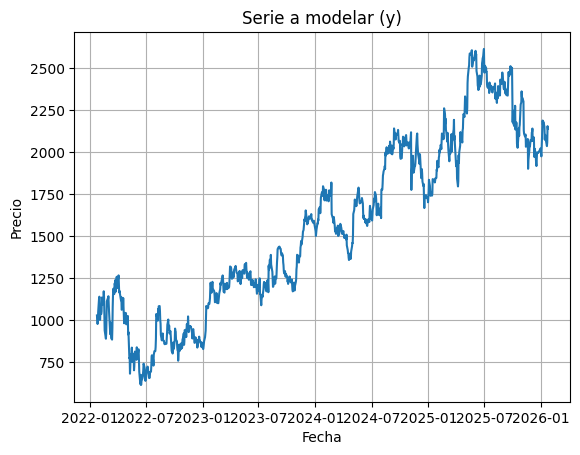

In [4]:
# ============================================================
# 3) (Opcional) Log-returns
# ============================================================
if USE_LOG_RETURN:
    data["y"] = np.log(data["y"] / data["y"].shift(1))
    data = data.dropna().copy()

plt.figure()
plt.plot(data.index, data["y"])
plt.title("Serie a modelar (y)")
plt.xlabel("Fecha")
plt.ylabel("Precio" if not USE_LOG_RETURN else "Log-return")
plt.grid(True)
plt.show()

In [5]:
# ============================================================
# 4) Split Train/Test + Escalado
# ============================================================
# Usamos los últimos TEST_SIZE_DAYS para evaluación
train = data.iloc[:-TEST_SIZE_DAYS].copy()
test  = data.iloc[-TEST_SIZE_DAYS:].copy()

scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train[["y"]])
test_scaled  = scaler.transform(test[["y"]])

print("Tamaños: train:", train.shape, " test:", test.shape)

Tamaños: train: (824, 1)  test: (180, 1)


In [6]:
# ============================================================
# 5) Ventanas deslizantes (sliding windows)
# ============================================================
def make_windows(series, lookback):
    X, y = [], []
    for i in range(lookback, len(series)):
        X.append(series[i-lookback:i, 0])
        y.append(series[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

X_train, y_train = make_windows(train_scaled, LOOKBACK)
X_test,  y_test  = make_windows(np.vstack([train_scaled[-LOOKBACK:], test_scaled]), LOOKBACK)

# Reshape a (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((704, 120, 1), (704,), (180, 120, 1), (180,))


📊 Explicación de la Red LSTM con Grafos

1️⃣ Estructura general del modelo

El modelo se define como:
```
model = Sequential([
    LSTM(64, input_shape=(LOOKBACK, 1), return_sequences=True),
    Dropout(DROPOUT_RATE),
    LSTM(32, return_sequences=False),
    Dropout(DROPOUT_RATE),
    Dense(1)
])
```
Visualmente, este modelo puede representarse como un grafo dirigido, donde los nodos son capas y las aristas (flechas) representan el flujo de datos.

⸻

2️⃣ Grafo jerárquico del modelo
```

          ┌─────────────────────┐
          │   Input (LOOKBACK,1)│
          └──────────┬──────────┘
                     │
                     ▼
           ┌────────────────────┐
           │   LSTM Layer 1     │
           │ Units = 64         │
           │ return_sequences=T │
           └──────────┬─────────┘
                     │
                     ▼
           ┌────────────────────┐
           │   Dropout Layer 1  │
           │ Rate = p (ej. 0.2) │
           └──────────┬─────────┘
                     │
                     ▼
           ┌────────────────────┐
           │   LSTM Layer 2     │
           │ Units = 32         │
           │ return_sequences=F │
           └──────────┬─────────┘
                     │
                     ▼
           ┌────────────────────┐
           │   Dropout Layer 2  │
           │ Rate = p (ej. 0.2) │
           └──────────┬─────────┘
                     │
                     ▼
           ┌────────────────────┐
           │     Dense Layer    │
           │ Units = 1          │
           │ Activ. = Linear    │
           └──────────┘
```
Cada flecha → representa el flujo de información entre capas.

⸻

3️⃣ Interpretación conceptual del grafo

|Capa	|Tipo|	Descripción|	Rol en el modelo|
|---|---|---|---|
|Input| (LOOKBACK, 1)|	Entrada	Serie temporal (ej. 60 días con 1 variable)|	Define el contexto temporal|
|LSTM(64)|	Recurrente	|Procesa la secuencia completa	|Aprende dependencias de largo plazo|
|Dropout|	Regularización|	Apaga aleatoriamente neuronas	|Evita sobreajuste|
|LSTM(32)|	Recurrente	|Recibe la salida de la primera LSTM	|Refina patrones temporales|
|Dropout	|Regularización	|Segundo filtro de ruido	|Controla la varianza|
|Dense(1)|	Salida	|Predicción final (ej. precio o retorno)	|Genera el valor numérico final|


⸻

4️⃣ Representación del flujo interno (subgrafo LSTM)

Cada capa LSTM internamente es un pequeño grafo con cuatro puertas que interactúan entre sí:
```

                ┌────────────┐
Input_t  ─────▶│            │
                │  Input Gate│───┐
                └────────────┘   │
                                 ▼
                               ┌──────┐
PrevCell ─────────┬─────── ──▶│ Cell │───────┬────────▶ Output_t
                  │            └──────┘       │
                  ▼                           │
              ┌──────────┐                    │
              │ Forget   │                    │
              │ Gate     │────────────────────┘
              └──────────┘
````

Explicación de las puertas:

	•	Input Gate (iₜ): controla qué información nueva entra.
	•	Forget Gate (fₜ): decide qué parte de la memoria anterior se olvida.
	•	Cell State (cₜ): almacena información de largo plazo.
	•	Output Gate (oₜ): decide qué parte del estado se muestra como salida.

⸻

5️⃣ Grafo completo con subprocesos internos
```

            ┌──────────────────────────────────────────────────────┐
            │                   LSTM (64)                         │
            │ ┌──────────┐  ┌──────────┐  ┌──────────┐  ┌────────┐ │
Input_t ───▶│ │InputGate │→│ForgetGate│→│CellState│→│Output│ │→ Hidden_t
            │ └──────────┘  └──────────┘  └──────────┘  └────────┘ │
            └──────────────────────────────────────────────────────┘
                               │
                               ▼
                       Dropout (0.2)
                               │
                               ▼
                          LSTM (32)
                               │
                               ▼
                       Dropout (0.2)
                               │
                               ▼
                          Dense (1)

```
⸻

🔎 Conclusión

En términos de grafos, una LSTM secuencial puede entenderse como una composición de subgrafos recurrentes (LSTM) conectados linealmente a través de capas de regularización y una capa densa final.

El grafo completo representa un flujo de información con memoria temporal, donde cada nodo (LSTM) resume información de varias observaciones pasadas para producir una predicción futura.



In [7]:
# ============================================================
# 6) Modelo LSTM
# ============================================================
model = Sequential([
    LSTM(64, input_shape=(LOOKBACK,1), return_sequences=True),
    Dropout(DROPOUT_RATE),
    LSTM(32, return_sequences=False),
    Dropout(DROPOUT_RATE),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0630 - val_loss: 0.0325
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0102 - val_loss: 0.0041
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0072 - val_loss: 0.0066
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0048 - val_loss: 0.0036
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0

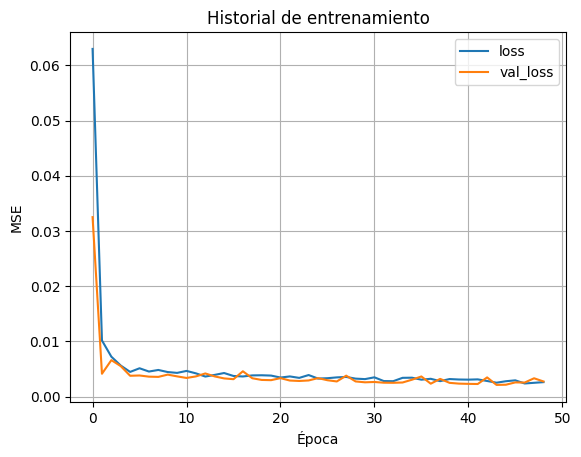

In [8]:
# ============================================================
# 7) Entrenamiento con EarlyStopping
# ============================================================
es = EarlyStopping(monitor="val_loss", patience=PATIENCE_ES, restore_best_weights=True, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)

plt.figure()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Historial de entrenamiento")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

MSE:  6870.5124
RMSE: 82.8886
MAE:  64.9370
R²:   0.8113


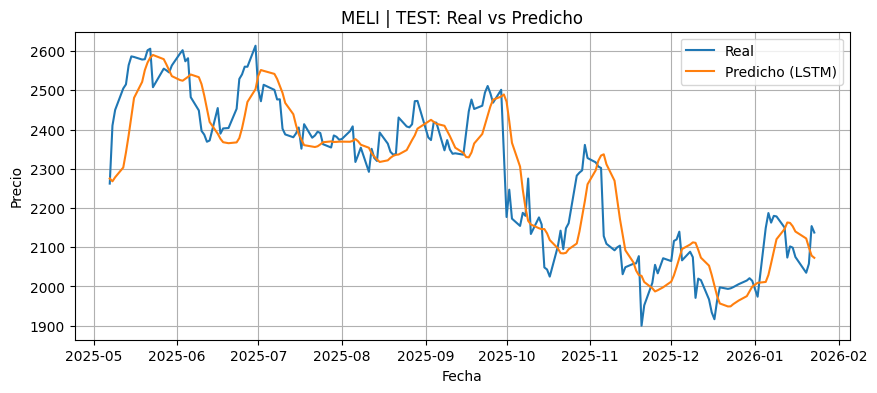

In [9]:
# ============================================================
# 8) Evaluación en TEST
# ============================================================
y_pred_scaled = model.predict(X_test, verbose=0)

# Invertir el escalado para interpretar
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1)).ravel()
y_pred_inv = scaler.inverse_transform(y_pred_scaled).ravel()

mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2  = r2_score(y_test_inv, y_pred_inv)

print(f"MSE:  {mse:.4f}\nRMSE: {rmse:.4f}\nMAE:  {mae:.4f}\nR²:   {r2:.4f}")

# Gráfico: real vs predicho (zona TEST)
plt.figure(figsize=(10,4))

x_idx = test.index  # <- usar TODO el índice del test (mismo largo que y_test_inv)
assert len(x_idx) == len(y_test_inv) == len(y_pred_inv), \
       f"Lens -> idx:{len(x_idx)} y_test:{len(y_test_inv)} y_pred:{len(y_pred_inv)}"

plt.plot(x_idx, y_test_inv, label="Real")
plt.plot(x_idx, y_pred_inv, label="Predicho (LSTM)")
plt.title(f"{TICKER} | TEST: Real vs Predicho")
plt.xlabel("Fecha")
plt.ylabel("Precio" if not USE_LOG_RETURN else "Log-return")
plt.legend()
plt.grid(True)
plt.show()

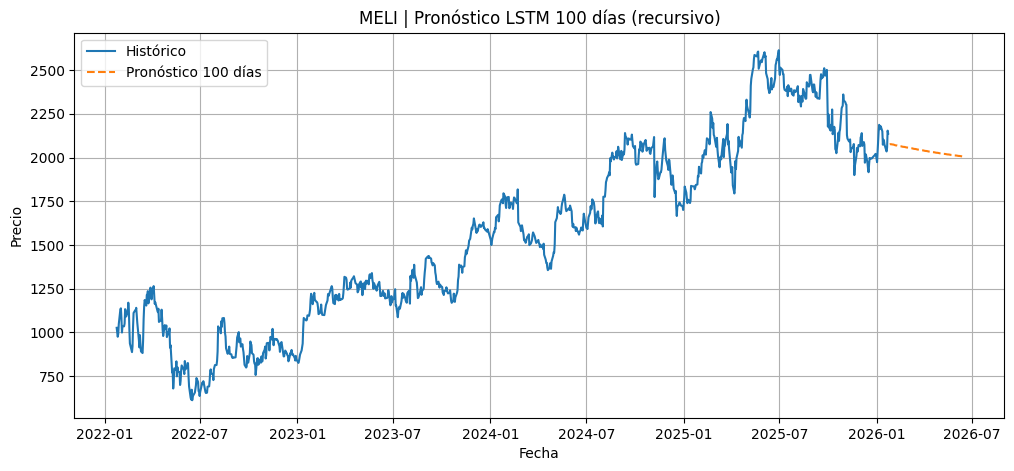

=== HEAD ===
               Forecast
Date                   
2026-01-26  2075.552734
2026-01-27  2076.391113
2026-01-28  2076.489258
2026-01-29  2076.047363
2026-01-30  2075.247559

=== TAIL ===
               Forecast
Date                   
2026-06-08  2008.818848
2026-06-09  2008.269653
2026-06-10  2007.723877
2026-06-11  2007.181274
2026-06-12  2006.641968


In [10]:
# ============================================================
# 9) Pronóstico a 100 días (recursivo)
# ============================================================
last_window = np.vstack([train_scaled, test_scaled])[-LOOKBACK:].copy().ravel()

forecast_scaled = []
current_window = last_window.copy()

for _ in range(FORECAST_HORIZON):
    x = current_window.reshape(1, LOOKBACK, 1)
    yhat = model.predict(x, verbose=0)[0,0]
    forecast_scaled.append(yhat)
    # deslizante: quitamos el primero, añadimos yhat
    current_window = np.roll(current_window, -1)
    current_window[-1] = yhat

forecast_scaled = np.array(forecast_scaled).reshape(-1,1)
forecast_inv = scaler.inverse_transform(forecast_scaled).ravel()

# Construir índice de fechas futuro (mismo intervalo ~ diario)
last_date = data.index[-1]
future_idx = pd.bdate_range(last_date, periods=FORECAST_HORIZON+1, freq="B")[1:]  # días hábiles

# Gráfico: histórico + pronóstico
plt.figure(figsize=(12,5))
plt.plot(data.index, data["y"], label="Histórico")
plt.plot(future_idx, forecast_inv, label=f"Pronóstico {FORECAST_HORIZON} días", linestyle="--")
plt.title(f"{TICKER} | Pronóstico LSTM {FORECAST_HORIZON} días (recursivo)")
plt.xlabel("Fecha")
plt.ylabel("Precio" if not USE_LOG_RETURN else "Log-return")
plt.legend()
plt.grid(True)
plt.show()

# Tabla head/tail del pronóstico
forecast_df = pd.DataFrame({"Date": future_idx, "Forecast": forecast_inv}).set_index("Date")
print("=== HEAD ===")
print(forecast_df.head())
print("\n=== TAIL ===")
print(forecast_df.tail())

### Notas didácticas
- **Ventanas (LOOKBACK)**: cuántos días pasados usamos para predecir el siguiente.  
- **Escalado MinMax**: ayuda a que la LSTM converja; invertimos el escalado para interpretar en unidades originales.  
- **Pronóstico recursivo**: realimenta sus propias predicciones; útil para *H* pasos adelante, pero acumula error.  
- Para **log-returns** (`USE_LOG_RETURN=True`), las métricas se interpretan en términos de retornos; si quieres reconstruir precios, necesitarás **reintegrar** (aplicar acumulación exponencial sobre el último precio).  
- Prueba **GRU**, **BiLSTM** o **capas adicionales** para comparar.